# AUTO1 GROUP Data Science Challenge

Author: Kai Chen
Date:   May, 2018

Please take a look at the dataset in the file “Auto1-DS-TestData.csv” (see https://archive.ics.uci.edu/ml/datasets/Automobile for information on the features and other attributes) and answer the following questions:

### Question 1 (10 Points)
List as many use cases for the dataset as possible.

### Question 2 (10 Points)
Auto1 has a similar dataset (yet much larger...) 
Pick one of the use cases you listed in question 1 and describe how building a statistical model based on the dataset could best be used to improve Auto1’s business.

### Question 3 (20 Points)
Implement the model you described in question 2 in R or Python. The code has to retrieve the data, train and test a statistical model, and report relevant performance criteria. 

When submitting the challenge, send us the link for a Git repository containing the code for analysis and the potential pre-processing steps you needed to apply to the dataset. You can use your own account at github.com or create a new one specifically for this challenge if you feel more comfortable.

Ideally, we should be able to replicate your analysis from your submitted source-code, so please explicit the versions of the tools and packages you are using (R, Python, etc).


### Question 4 (60 Points)
A. Explain each and every of your design choices (e.g., preprocessing, model selection, hyper parameters, evaluation criteria). Compare and contrast your choices with alternative methodologies. 

B. Describe how you would improve the model in Question 3 if you had more time.

### Attribute Information:

Attribute: Attribute Range

1. symboling: -3, -2, -1, 0, 1, 2, 3.
2. normalized-losses: continuous from 65 to 256.
3. make:
alfa-romero, audi, bmw, chevrolet, dodge, honda,
isuzu, jaguar, mazda, mercedes-benz, mercury,
mitsubishi, nissan, peugot, plymouth, porsche,
renault, saab, subaru, toyota, volkswagen, volvo

4. fuel-type: diesel, gas.
5. aspiration: std, turbo.
6. num-of-doors: four, two.
7. body-style: hardtop, wagon, sedan, hatchback, convertible.
8. drive-wheels: 4wd, fwd, rwd.
9. engine-location: front, rear.
10. wheel-base: continuous from 86.6 120.9.
11. length: continuous from 141.1 to 208.1.
12. width: continuous from 60.3 to 72.3.
13. height: continuous from 47.8 to 59.8.
14. curb-weight: continuous from 1488 to 4066.
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. num-of-cylinders: eight, five, four, six, three, twelve, two.
17. engine-size: continuous from 61 to 326.
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. bore: continuous from 2.54 to 3.94.
20. stroke: continuous from 2.07 to 4.17.
21. compression-ratio: continuous from 7 to 23.
22. horsepower: continuous from 48 to 288.
23. peak-rpm: continuous from 4150 to 6600.
24. city-mpg: continuous from 13 to 49.
25. highway-mpg: continuous from 16 to 54.
26. price: continuous from 5118 to 45400.




In [171]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from pandas.api.types import is_string_dtype, is_numeric_dtype
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import math

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import seaborn as sns

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import Normalizer
import statsmodels.formula.api as smf

np.random.seed(42)

## Step 1. Data Preparation and Exploration

* Convert '?' to None
* Convert columns ("normalized-losses", "bore", "stroke", "horsepower", "peak-rpm", "price") to continuous variable
* Make all string type variables to categorical variables
* Handle missing values:
    - For categorial variables, we don't need to do anything, because pandas automatically convert NA to -1 for categorical variables.
    
    - For continuous variables, we need to replace NA with mean or median. Then create a col_NA column to indicate which row has NAs.
*  Convert categorical variables to their numberic representations.


In [90]:
df_raw = pd.read_csv('Auto1-DS-TestData.csv', low_memory=False)

In [91]:
df_raw.shape

(205, 26)

In [92]:
display(df_raw.head(3))

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


In [93]:
print(df_raw.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-ratio    205 non-null float64
horsepower           205 non-nul

In [94]:
df_raw.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [95]:
# convert '?' to None
df_raw = df_raw.replace('?', np.nan)

In [96]:
# extract all string-type columns
cols_str = []
for col in df_raw:
    if is_string_dtype(df_raw[col]):
        cols_str.append(col)
print(cols_str)

['normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']


In [97]:
# convert following columns to continuous variables based on data description
# normalized-losses, bore, stroke, horsepower, peak-rpm, price
cols = ["normalized-losses", "bore", "stroke", "horsepower", "peak-rpm", "price"]
for col in cols:
    df_raw[col] = pd.to_numeric(df_raw[col], errors='raise')

In [98]:
# make all string type variables to categorical variables.
for col in df_raw:
    if is_string_dtype(df_raw[col]):
        df_raw[col] = df_raw[col].astype('category').cat.as_ordered()

In [99]:
# Handle missing values: 
# - For categorial variables, we don't need to do anything, 
# because pandas automatically convert NA to -1 for categorical variables. 
# - For continuous variables, we need to replace NA with mean or median. 
# Then create a col_NA column to indicate which row has NAs.

for col in df_raw:
    if is_numeric_dtype(df_raw[col]):
        col_vals = df_raw[col]
        if sum(col_vals.isnull()) != 0:
            df_raw[col+'_na'] = col_vals.isnull()
            df_raw[col] = col_vals.fillna(col_vals.median())

In [100]:
# Convert categorical variables to their numberic representations.
for col in df_raw:
    if str(df_raw[col].dtype) == "category":
        df_raw[col] = df_raw[col].cat.codes + 1

In [101]:
display(df_raw.head(5))

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,peak-rpm,city-mpg,highway-mpg,price,normalized-losses_na,bore_na,stroke_na,horsepower_na,peak-rpm_na,price_na
0,3,115.0,1,2,1,2,1,3,1,88.6,...,5000.0,21,27,13495.0,True,False,False,False,False,False
1,3,115.0,1,2,1,2,1,3,1,88.6,...,5000.0,21,27,16500.0,True,False,False,False,False,False
2,1,115.0,1,2,1,2,3,3,1,94.5,...,5000.0,19,26,16500.0,True,False,False,False,False,False
3,2,164.0,2,2,1,1,4,2,1,99.8,...,5500.0,24,30,13950.0,False,False,False,False,False,False
4,2,164.0,2,2,1,1,4,1,1,99.4,...,5500.0,18,22,17450.0,False,False,False,False,False,False


In [102]:
print(df_raw.describe())

        symboling  normalized-losses        make   fuel-type  aspiration  \
count  205.000000         205.000000  205.000000  205.000000  205.000000   
mean     0.834146         120.600000   13.195122    1.902439    1.180488   
std      1.245307          31.805105    6.274831    0.297446    0.385535   
min     -2.000000          65.000000    1.000000    1.000000    1.000000   
25%      0.000000         101.000000    9.000000    2.000000    1.000000   
50%      1.000000         115.000000   13.000000    2.000000    1.000000   
75%      2.000000         137.000000   20.000000    2.000000    1.000000   
max      3.000000         256.000000   22.000000    2.000000    2.000000   

       num-of-doors  body-style  drive-wheels  engine-location  wheel-base  \
count    205.000000  205.000000    205.000000       205.000000  205.000000   
mean       1.424390    3.614634      2.326829         1.014634   98.756585   
std        0.514867    0.859081      0.556171         0.120377    6.021776   
min

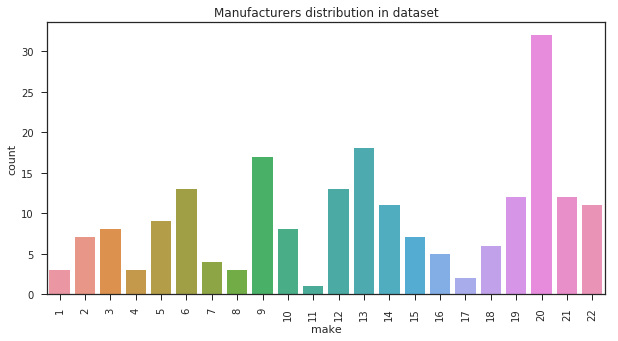

In [109]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10,5))
sns.countplot(x='make', data=df_raw)
plt.xticks(rotation='vertical')
plt.title('Manufacturers distribution in dataset')
plt.show()

# It shows that the top selling car manufactorer is Toyota (20)

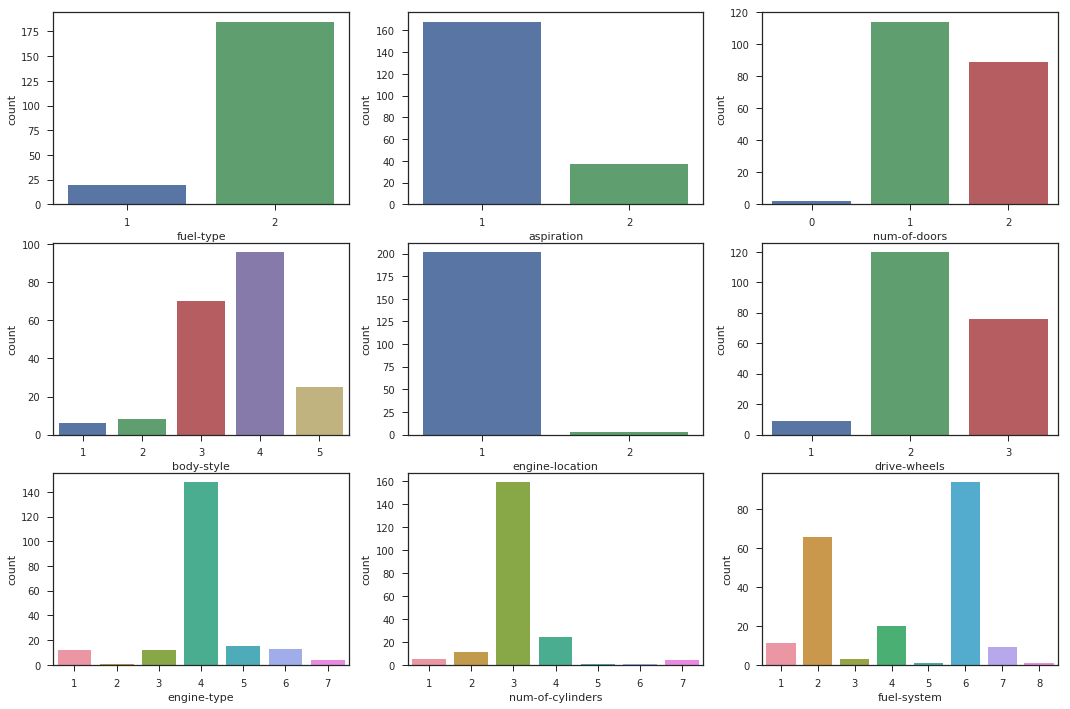

In [112]:
categorical = ['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'engine-location',
               'drive-wheels', 'engine-type', 'num-of-cylinders', 'fuel-system']
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
for col, ax in zip(categorical[1:], axs.ravel()):
    sns.countplot(x=col, data=df_raw, ax=ax)
    

In [113]:
df_raw.corr()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,peak-rpm,city-mpg,highway-mpg,price,normalized-losses_na,bore_na,stroke_na,horsepower_na,peak-rpm_na,price_na
symboling,1.000000,0.457484,-0.118794,0.194311,-0.059866,0.645492,-0.596135,-0.041671,0.212471,-0.531954,...,0.273851,-0.035823,0.034606,-0.080149,0.066754,0.245950,0.245950,0.013252,0.013252,-0.037945
normalized-losses,0.457484,1.000000,-0.231427,0.104668,-0.011273,0.330122,-0.244639,0.287316,-0.021510,-0.073709,...,0.241134,-0.189530,-0.149357,0.095489,-0.088252,0.130721,0.130721,-0.017519,-0.017519,-0.024899
make,-0.118794,-0.231427,1.000000,-0.113191,0.054265,-0.127416,0.089494,-0.004317,0.054608,0.078505,...,-0.217386,0.053642,0.050022,-0.155259,-0.210412,-0.094545,-0.094545,0.060335,0.060335,-0.117081
fuel-type,0.194311,0.104668,-0.113191,1.000000,-0.401397,0.207665,-0.147853,-0.132257,0.040070,-0.308346,...,0.477507,-0.255963,-0.191392,-0.112439,-0.041100,0.046383,0.046383,0.032636,0.032636,0.046383
aspiration,-0.059866,-0.011273,0.054265,-0.401397,1.000000,-0.066737,0.063028,0.066465,-0.057191,0.257611,...,-0.184326,-0.202362,-0.254416,0.175745,0.050735,-0.066203,-0.066203,-0.046581,-0.046581,0.025497
num-of-doors,0.645492,0.330122,-0.127416,0.207665,-0.066737,1.000000,-0.670198,0.112398,0.136578,-0.416331,...,0.234101,-0.000142,0.021628,-0.036475,0.061734,0.158098,0.158098,0.014612,0.014612,0.089433
body-style,-0.596135,-0.244639,0.089494,-0.147853,0.063028,-0.670198,1.000000,-0.155745,-0.277009,0.401362,...,-0.108709,0.031697,-0.007170,-0.071614,-0.059767,-0.101176,-0.101176,0.044634,0.044634,-0.018870
drive-wheels,-0.041671,0.287316,-0.004317,-0.132257,0.066465,0.112398,-0.155745,1.000000,0.147865,0.459745,...,-0.040620,-0.449581,-0.452220,0.580367,0.254975,0.171163,0.171163,-0.058471,-0.058471,-0.083101
engine-location,0.212471,-0.021510,0.054608,0.040070,-0.057191,0.136578,-0.277009,0.147865,1.000000,-0.187790,...,0.198190,-0.153487,-0.102026,0.331459,0.243733,-0.017192,-0.017192,-0.012096,-0.012096,-0.017192
wheel-base,-0.531954,-0.073709,0.078505,-0.308346,0.257611,-0.416331,0.401362,0.459745,-0.187790,1.000000,...,-0.361338,-0.470414,-0.544082,0.584847,0.197288,-0.081174,-0.081174,-0.043896,-0.043896,-0.047709


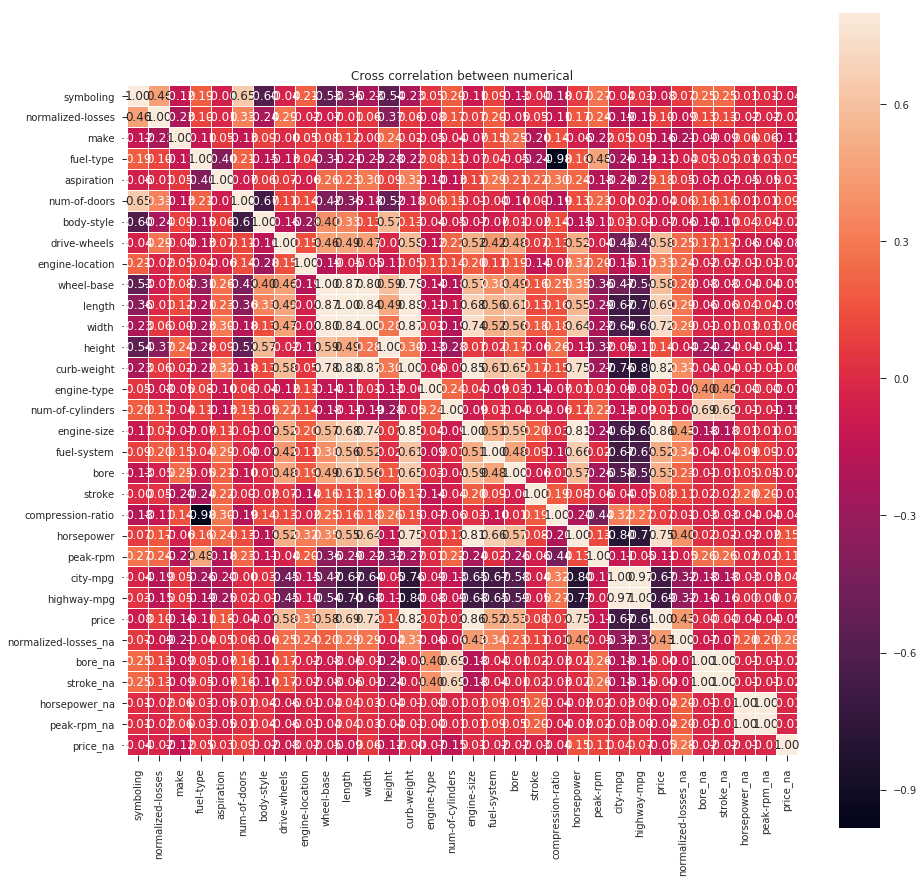

In [128]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15, 15))
ax = sns.heatmap(df_raw.corr(), vmax=.8, square=True, fmt='.2f', annot=True, linecolor='white', linewidths=0.01)
plt.title('Cross correlation between numerical')
plt.show()

# It shows that 
# - Wheel base , Length , Width are highly correlated. 
# - Highway mpg and city mpg are also highly correlated. 
# - Compression ratio and fuel type are highly correlated 
# - Engine size and horse power are highly correlated
# - bore_na and stroke_na are highly correlated
# - horsepower_na and peak-rpm_na are highly correlated

In [129]:
# remove highly correlated columns
df_uncor = df_raw.drop(['length','width','city-mpg','fuel-type','horsepower', 'stroke_na', 'peak-rpm_na'],axis=1)
df_uncor.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,height,...,bore,stroke,compression-ratio,peak-rpm,highway-mpg,price,normalized-losses_na,bore_na,horsepower_na,price_na
0,3,115.0,1,1,2,1,3,1,88.6,48.8,...,3.47,2.68,9.0,5000.0,27,13495.0,True,False,False,False
1,3,115.0,1,1,2,1,3,1,88.6,48.8,...,3.47,2.68,9.0,5000.0,27,16500.0,True,False,False,False
2,1,115.0,1,1,2,3,3,1,94.5,52.4,...,2.68,3.47,9.0,5000.0,26,16500.0,True,False,False,False
3,2,164.0,2,1,1,4,2,1,99.8,54.3,...,3.19,3.40,10.0,5500.0,30,13950.0,False,False,False,False
4,2,164.0,2,1,1,4,1,1,99.4,54.3,...,3.19,3.40,8.0,5500.0,22,17450.0,False,False,False,False


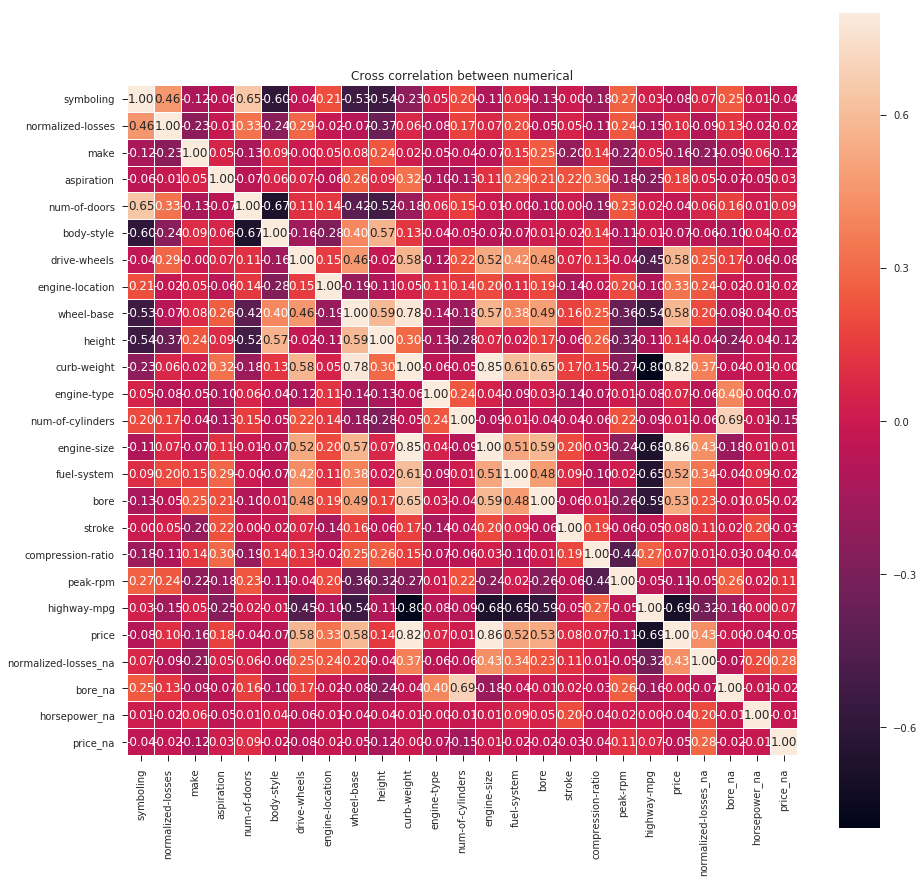

In [130]:
plt.figure(figsize=(15, 15))
ax = sns.heatmap(df_uncor.corr(), vmax=.8, square=True, fmt='.2f', annot=True, linecolor='white', linewidths=0.01)
plt.title('Cross correlation between numerical')
plt.show()

In [136]:
print(df_uncor.shape)

(205, 25)


## Step 2. Predict Categorical Symboling

### Results on raw data

In [131]:
X = df_raw.drop("symboling", axis=1)
y = df_raw["symboling"].astype('category')
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 99)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((164, 31), (41, 31), (164,), (41,))

In [132]:
clf = RandomForestClassifier(n_jobs=-1)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [133]:
train_score = clf.score(X_train, y_train)
val_score = clf.score(X_val, y_val)

print('train score: {}'.format(round(train_score, 3)))
print('validation score: {}'.format(round(val_score, 3)))

train score: 0.994
validation score: 0.78


## Results on removed highly correlated features

In [134]:
X = df_uncor.drop("symboling", axis=1)
y = df_uncor["symboling"].astype('category')
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 99)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((164, 24), (41, 24), (164,), (41,))

In [137]:
clf = RandomForestClassifier(n_jobs=-1)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [138]:
train_score = clf.score(X_train, y_train)
val_score = clf.score(X_val, y_val)

print('train score: {}'.format(round(train_score, 3)))
print('validation score: {}'.format(round(val_score, 3)))

train score: 0.994
validation score: 0.78


In [50]:
def plot_performance(x_list, y_list, title, x_label, y_label):
    """
    define the plotting function
    """
    plt.plot(x_list, y_list)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

In [53]:
# parameter tuning
# Tune three parameters: n_estimators, min_samepls_leaf, and max_features

numOfestimators = [1, 10, 20]
numOfleafs = [1, 5, 10]
numOffeatures = np.arange(0.1, 1, 0.2)

train_scores = []
val_scores = []
best_result = []

for numOfestimator in numOfestimators:
    for numOfleaf in numOfleafs:
        for numOffeature in numOffeatures:  
            clf = RandomForestClassifier(n_jobs=-1, n_estimators=numOfestimator,
                                         min_samples_leaf=numOfleaf, max_features=numOffeature)
            # print(result)
            clf.fit(X_train, y_train)
            
            train_score = round(clf.score(X_train, y_train), 3)
            train_scores.append(train_score)
            
            val_score = round(clf.score(X_val, y_val), 3)
            val_scores.append(val_score)
            
            result = [numOfestimator, numOfleaf, numOffeature]
            result.append(train_score)
            result.append(val_score)
            
            if len(best_result) == 0: best_result = result
            elif best_result[4] < result[4]: 
                best_result = result
            
            print('\nnum of estimator: {}  num of leaf: {}  num of features: {}'.format(numOfestimator, numOfleaf, numOffeature))
            print('train score: {}  val score: {}'.format(train_score, val_score))
            
print('\nfinal score')
print('numOfestimators', 'numOfleafs', 'numOffeatures', 'train score', 'val score')
print(best_result)            
# plot_performance(train_scores, val_scores, 'train scores', 'validation scores', 'accuracy')


num of estimator: 1  num of leaf: 1  num of features: 0.1
train score: 0.872  val score: 0.634

num of estimator: 1  num of leaf: 1  num of features: 0.30000000000000004
train score: 0.872  val score: 0.683

num of estimator: 1  num of leaf: 1  num of features: 0.5000000000000001
train score: 0.854  val score: 0.683

num of estimator: 1  num of leaf: 1  num of features: 0.7000000000000001
train score: 0.915  val score: 0.732

num of estimator: 1  num of leaf: 1  num of features: 0.9000000000000001
train score: 0.909  val score: 0.707

num of estimator: 1  num of leaf: 5  num of features: 0.1
train score: 0.64  val score: 0.561

num of estimator: 1  num of leaf: 5  num of features: 0.30000000000000004
train score: 0.598  val score: 0.463

num of estimator: 1  num of leaf: 5  num of features: 0.5000000000000001
train score: 0.689  val score: 0.707

num of estimator: 1  num of leaf: 5  num of features: 0.7000000000000001
train score: 0.762  val score: 0.61

num of estimator: 1  num of le

## Step 3. Predict Price

### Results on raw data

In [140]:
X = df_raw.drop('price', axis=1)
y = df_raw['price']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((164, 31), (41, 31), (164,), (41,))

In [141]:
clf = RandomForestRegressor(n_jobs=-1)
clf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [142]:
def rmse(preds, actuals):
    return math.sqrt(((preds-actuals)**2).mean())

In [143]:
rmse_train = rmse(clf.predict(X_train), y_train)
rmse_val = rmse(clf.predict(X_val), y_val)
score_train = clf.score(X_train, y_train)
score_val = clf.score(X_val, y_val)

print('train rmse: {}'.format(round(rmse_train, 3)))
print('validation rmse: {}'.format(round(rmse_val, 3)))
print('train score: {}'.format(round(score_train, 3)))
print('validation score: {}'.format(round(score_val, 3)))

train rmse: 1339.656
validation rmse: 2815.001
train score: 0.972
validation score: 0.83


### Results on removed highly correlated features

In [181]:
X = df_uncor.drop('price', axis=1)
y = df_uncor['price']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((164, 24), (41, 24), (164,), (41,))

In [182]:
clf = RandomForestRegressor(n_jobs=-1)
clf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [183]:
rmse_train = rmse(clf.predict(X_train), y_train)
rmse_val = rmse(clf.predict(X_val), y_val)
score_train = clf.score(X_train, y_train)
score_val = clf.score(X_val, y_val)

print('train rmse: {}'.format(round(rmse_train, 3)))
print('validation rmse: {}'.format(round(rmse_val, 3)))
print('train score: {}'.format(round(score_train, 3)))
print('validation score: {}'.format(round(score_val, 3)))

train rmse: 1286.464
validation rmse: 2420.486
train score: 0.971
validation score: 0.925


In [184]:
regressor = LinearRegression()
lm = regressor.fit(X_train, y_train)

rmse_train = rmse(lm.predict(X_train), y_train)
rmse_val = rmse(lm.predict(X_val), y_val)
score_train = lm.score(X_train, y_train)
score_val = lm.score(X_val, y_val)

print('train rmse: {}'.format(round(rmse_train, 3)))
print('validation rmse: {}'.format(round(rmse_val, 3)))
print('train score: {}'.format(round(score_train, 3)))
print('validation score: {}'.format(round(score_val, 3)))

train rmse: 2485.484
validation rmse: 3655.448
train score: 0.893
validation score: 0.83


In [185]:
normalizer = Normalizer()
X_train_norm = normalizer.fit_transform(X_train)
X_val_norm = normalizer.transform(X_val)

lm_norm = regressor.fit(X_train_norm, y_train)

rmse_train = rmse(lm_norm.predict(X_train_norm), y_train)
rmse_val = rmse(lm_norm.predict(X_val_norm), y_val)
score_train = lm_norm.score(X_train_norm, y_train)
score_val = lm_norm.score(X_val_norm, y_val)

print('train rmse: {}'.format(round(rmse_train, 3)))
print('validation rmse: {}'.format(round(rmse_val, 3)))
print('train score: {}'.format(round(score_train, 3)))
print('validation score: {}'.format(round(score_val, 3)))


train rmse: 2696.551
validation rmse: 4144.656
train score: 0.874
validation score: 0.781
